In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore,boxcox
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Importing Dataset

In [515]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [516]:
df.shape

(1599, 12)

In [517]:
df.info()  #count of non-null,type of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [518]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [519]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [520]:
df.dtypes   #datatype of each variable

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Univariant,Bivariant,multivariant Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

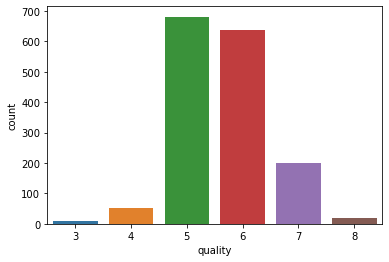

In [521]:
sns.countplot(df["quality"])

There are total 6 categories in the output variable 3 being the worst and 8 being the best. The above shows the count of each variety. As there is huge difference in each category we will go for class balancing technique.

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

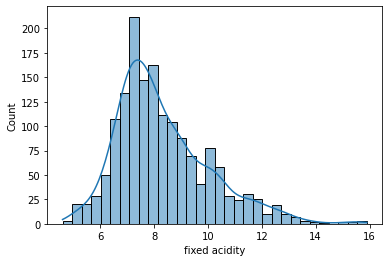

In [522]:
sns.histplot(df["fixed acidity"],kde=True)

Looking at the above plot, we can say that there is very minute skewness is present in fixed acidity variable. Data seems right skewed.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

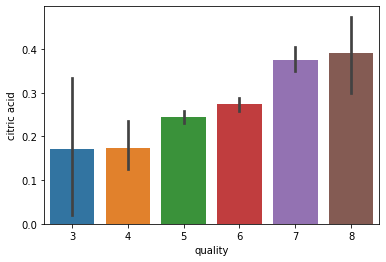

In [523]:
sns.barplot(x="quality",y="citric acid",data=df)

From Above plot we can see that level of citric acid is low in poor quality wine and is high in good quality wine.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

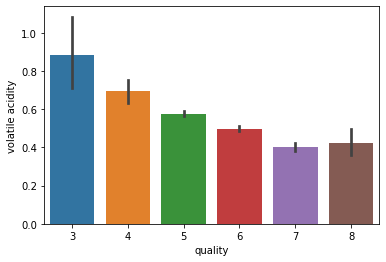

In [524]:
sns.barplot(x="quality",y="volatile acidity",data=df)

Volatile acidity is high is poor quality wine and is low in good quality wine.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

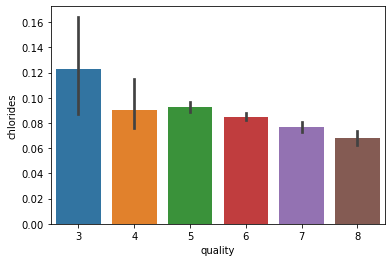

In [525]:
sns.barplot(x="quality",y="chlorides",data=df)

Chlorides are high in poor quality wine and low in good quality wine.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

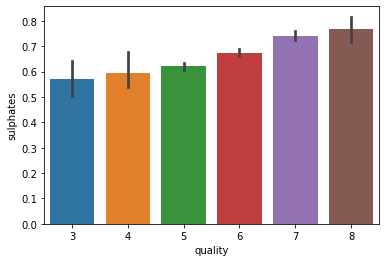

In [526]:
sns.barplot(x="quality",y="sulphates",data=df)

Sulphates are low in poor quality wine and high in good quality wine.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

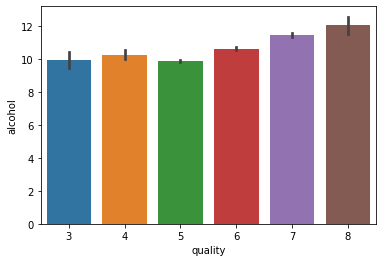

In [527]:
sns.barplot(x="quality",y="alcohol",data=df)

Alcohol level is low in poor quality wine and high in good quality wine.

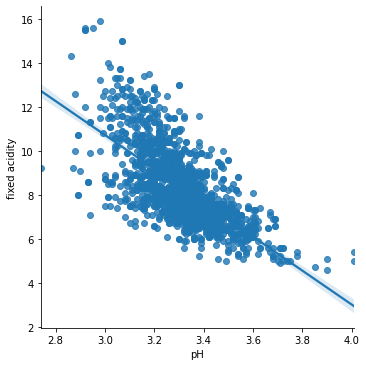

In [528]:
sns.lmplot(x="pH",y="fixed acidity",data=df)

Looking at the above line plot, we can say that PH value and fixed acidity are inversely propotional to each other.

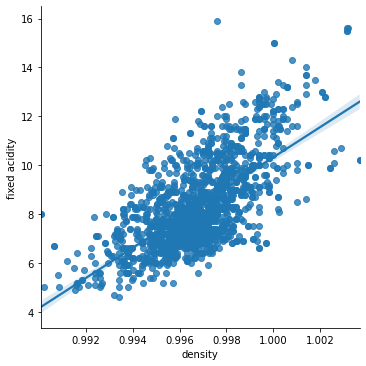

In [529]:
sns.lmplot(x="density",y="fixed acidity",data=df)

From above we can say that Fixed acidity and density are positively co-related to each other.

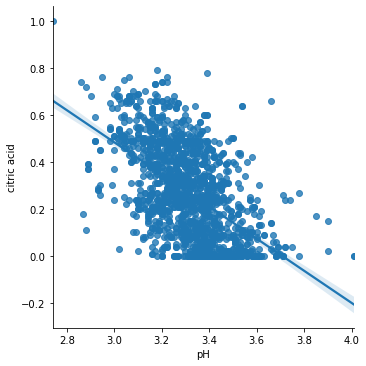

In [530]:
sns.lmplot(x="pH",y="citric acid",data=df)

Similarly Ph and Citric Acid are negetively corelated to each other.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

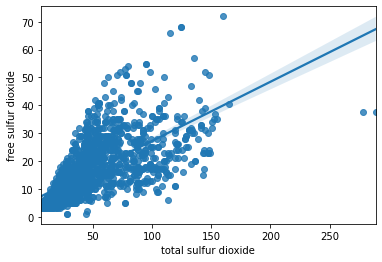

In [531]:
sns.regplot(x="total sulfur dioxide",y="free sulfur dioxide",data=df)

From above plot we can say that,Total sulphur dioxide and Free Sulphur Dioxide are highly corelated to each other.

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

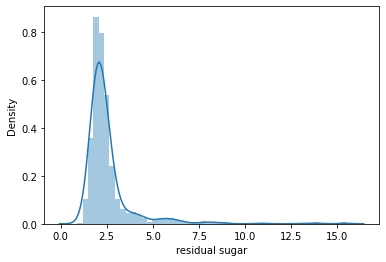

In [532]:
sns.distplot(df["residual sugar"])

From above distribution plot, we can see that the there is skewness in the variable. Data is right skewed and that can beacuse of outliers.

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

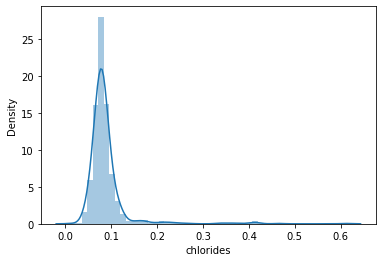

In [533]:
sns.distplot(df["chlorides"])

From above distribution plot, we can see that the there is skewness in the variable. Data is right skewed and that can beacuse of outliers.

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

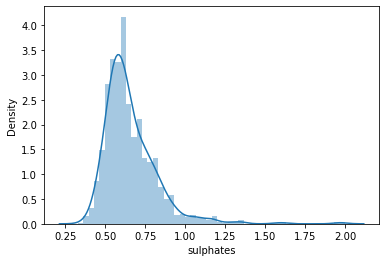

In [534]:
sns.distplot(df["sulphates"])

From above distribution plot, we can see that the there is skewness in the variable. Data is right skewed and that can beacuse of outliers.

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

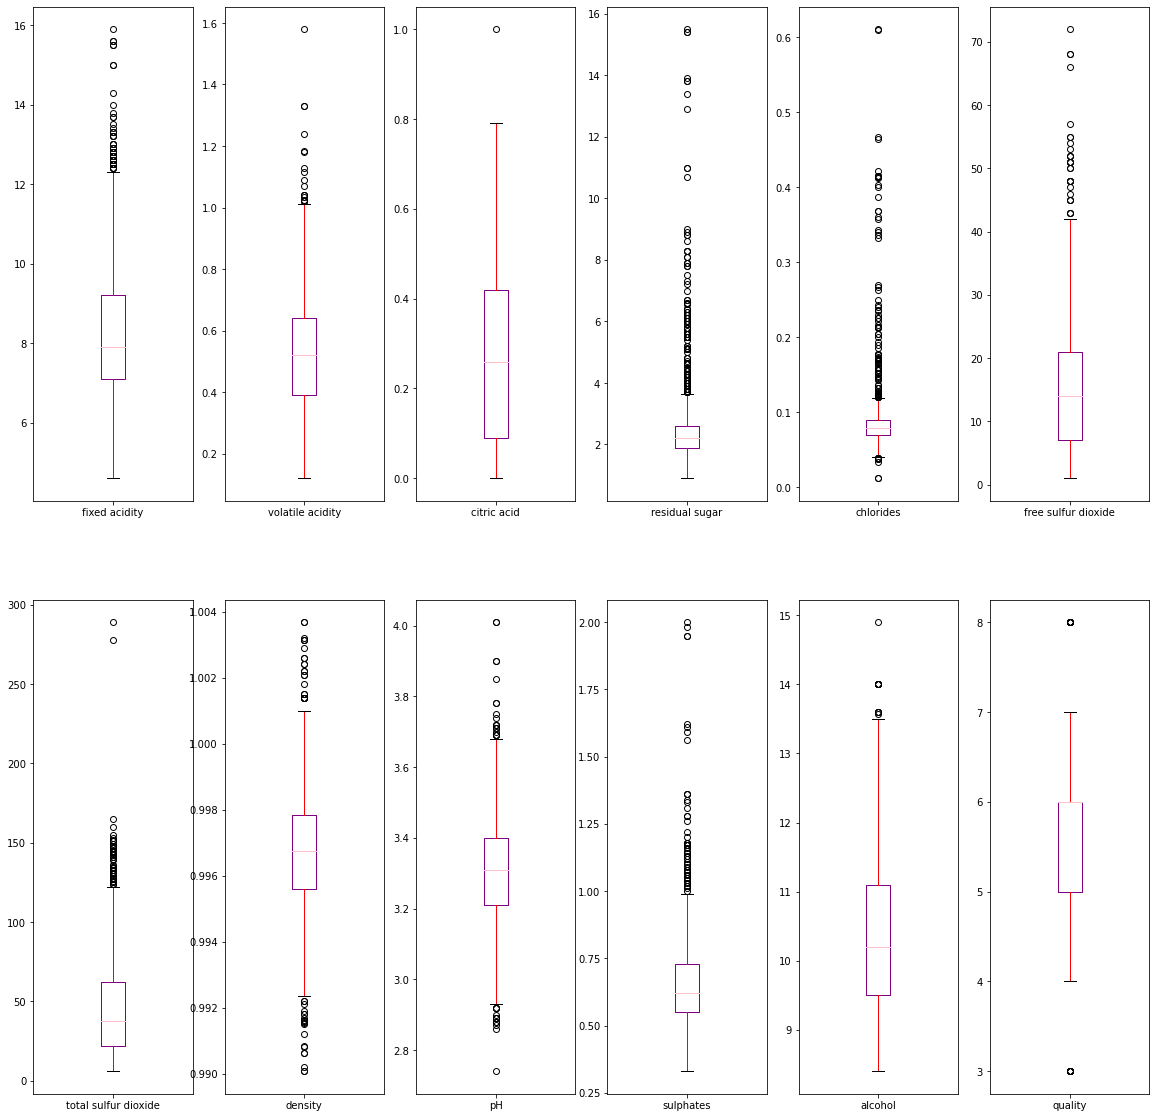

In [535]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(20,20),color=color)

From the above boxplot we can see that, outliers are present in our dataset almost every variable is having outliers to get the best results we must remove these outliers.

<AxesSubplot:>

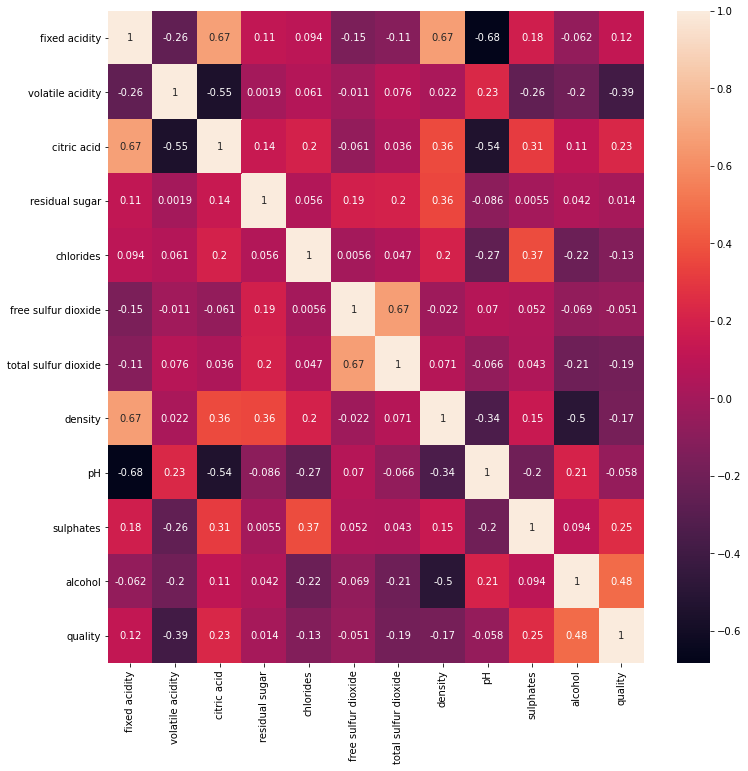

In [536]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing/Cleaning

In [537]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From Above we can see that, The mean is more that 50% that means skewness is present in some of the variables.
There is huge gap in 75% and max value of some of the variables which shows that the outliers are present in our dataset.
From above we can also see that there is no much gap present in the min and max values of variables so we can avoid Scaling.

In [538]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

From above we can see that residual sugar,chlorides and sulphates are highly skewed.

In [539]:
z=np.abs(zscore(df))    #removing outliers
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [540]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


From above we can see that after removing outliers the rows are reduced to 1452.


In [541]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

Skewness has been reduced to much extent but still the skewness is present we may use methods like log,sqrt transformations or boxcox method to remove skewness.

In [542]:
df_new["residual sugar"]=boxcox(df_new["residual sugar"],0)

In [543]:
df_new["chlorides"]=boxcox(df_new["chlorides"],0)

In [544]:
df_new["total sulfur dioxide"]=boxcox(df_new["total sulfur dioxide"],0)

In [545]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide     0.869250
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

Here we can see that there is no skewness present in our dataset.

# Dividing the Dataset into X:Independent Variable Y:Dependent Variable

In [546]:
x=df_new.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,4.204693,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,3.988984,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,4.094345,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,3.784190,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,3.931826,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,3.688879,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,3.784190,0.99547,3.57,0.71,10.2


In [547]:
y=df_new.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [548]:
y.shape

(1451,)

In [549]:
def calc_vif(x):                #Variance Inflation Factor
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [550]:
calc_vif(x)

,variables,VIF FACTOR
0,fixed acidity,87.836752
1,volatile acidity,19.319145
2,citric acid,9.046324
3,residual sugar,10.829123
4,chlorides,145.002186
5,free sulfur dioxide,8.126017
6,total sulfur dioxide,70.137731
7,density,1796.409069
8,pH,1230.667091
9,sulphates,31.684727


In [551]:
df_new.drop("density",axis=1,inplace=True)

In [552]:
x=df_new.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,3.51,0.56,9.4
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,4.204693,3.20,0.68,9.8
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,3.988984,3.26,0.65,9.8
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,4.094345,3.16,0.58,9.8
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,3.784190,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,3.931826,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,3.688879,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,3.784190,3.57,0.71,10.2


In [553]:
calc_vif(x)

,variables,VIF FACTOR
0,fixed acidity,47.407241
1,volatile acidity,19.271028
2,citric acid,9.033307
3,residual sugar,10.789122
4,chlorides,138.716110
5,free sulfur dioxide,7.913904
6,total sulfur dioxide,64.492392
7,pH,297.294592
8,sulphates,31.640389
9,alcohol,147.185813


Here we can see that after droping density variable the VIF of ph has also reduced.

In [554]:
df_new["quality"].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

As we can see that quality is a multiclass varaible i.e there are around 5 categories present in the target variable and the count of each class is highly imbalanced so to get rid of this we will be using SMOTE technique.

In [555]:
df_new["quality"]=df["quality"].apply(lambda x:1 if  x>=7 else 0)
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,3.51,0.56,9.4,0
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,4.204693,3.20,0.68,9.8,0
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,3.988984,3.26,0.65,9.8,0
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,4.094345,3.16,0.58,9.8,0
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,3.784190,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,3.931826,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,3.688879,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,3.784190,3.57,0.71,10.2,0


Here we are converting our multiclass target variable into binary class target variable so as to get better results through ROC_AUC curve and to improve the performance of the algorithms.
In this: for the categories in the range of 0 to 6 will be set as 0 and the categories from 7 and above will be marked as 1 which means poor quality will be 0 and good quality as 1 i.e arbitary cut off value is set at 7

In [556]:
x=df_new.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,3.51,0.56,9.4
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,4.204693,3.20,0.68,9.8
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,3.988984,3.26,0.65,9.8
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,4.094345,3.16,0.58,9.8
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,3.784190,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,3.931826,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,3.688879,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,3.784190,3.57,0.71,10.2


In [557]:
y=df_new.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64

In [558]:
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [559]:
y_res.value_counts()

0    1250
1    1250
Name: quality, dtype: int64

counts for poor and good quality are balanced.

In [560]:
y_res.shape

(2500,)

In [561]:
x_res.shape

(2500, 10)

# Performing Algorithms

In [562]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("Best accuracy is",round(maxacc,2),"at random state",maxrs)

Best accuracy is 0.86 at random state 21


In [563]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=21)

# 1. Logistic Regression

In [564]:
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
ac=accuracy_score(y_test1,pred)
ac=ac*100
print("Accuracy score",round(ac,2))
clas=classification_report(y_test1,pred)
print(clas)

Accuracy score 85.87
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       368
           1       0.87      0.85      0.86       382

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750



# 2.Decision Tree Classifier

In [565]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
az=az*100
print("accuracy score",round(az,2))
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 89.2
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       368
           1       0.88      0.91      0.90       382

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



# Support Vector Classifier

In [566]:
ker=["rbf","poly","linear"]
for i in ker:
    svc=SVC(kernel=i)
    svc.fit(x_train1,y_train1)
    pred=svc.predict(x_test1)
    print(i,accuracy_score(y_test1,pred))
    print(i,classification_report(y_test1,pred))

rbf 0.816
rbf               precision    recall  f1-score   support

           0       0.82      0.79      0.81       368
           1       0.81      0.84      0.82       382

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750

poly 0.8386666666666667
poly               precision    recall  f1-score   support

           0       0.85      0.82      0.83       368
           1       0.83      0.86      0.84       382

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750

linear 0.8466666666666667
linear               precision    recall  f1-score   support

           0       0.86      0.83      0.84       368
           1       0.84      0.87      0.85       382

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       75

In [567]:
svc1=SVC(kernel="linear")
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))


Accuracy Score 84.67
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       368
           1       0.84      0.87      0.85       382

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750



# 4.Random Forest Classifier

In [568]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 94.53
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       368
           1       0.94      0.96      0.95       382

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



# 5.Ada Boost Classifier

In [569]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 87.07
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       368
           1       0.87      0.87      0.87       382

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



# 6. K Neighbors Classifier

In [570]:
knn=KNeighborsClassifier()
knn.fit(x_train1,y_train1)
pred=knn.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 90.0
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       368
           1       0.85      0.97      0.91       382

    accuracy                           0.90       750
   macro avg       0.91      0.90      0.90       750
weighted avg       0.91      0.90      0.90       750



# Cross Validation 

In [571]:
print(cross_val_score(lm,x,y,cv=5).mean())  #Logistic Regression

0.8711221708733262


In [572]:
print(cross_val_score(rf,x,y,cv=5).mean())  #RandomForestClassifier

0.8731816565943833


In [573]:
print(cross_val_score(dtc,x,y,cv=5).mean())   #DecisionTreeClassifier

0.8111221708733263


In [574]:
print(cross_val_score(svc1,x,y,cv=5).mean()) #Support Vector Classifier

0.8642350989453726


In [575]:
print(cross_val_score(knn,x,y,cv=5).mean())  #K Neighbors Classifier

0.843547813722005


In [576]:
print(cross_val_score(ad,x,y,cv=5).mean())  #Ada Boost Classifier

0.8628415689062685


Comparing the Cross validation scores and Accuracy Score of each Algorithm In my opnion the Random Forest Classifier has performed the best as the diffrence between the cross validation score and accuracy score being the least in case of random forest classifier.

In [577]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 94.53
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       368
           1       0.94      0.95      0.95       382

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



# ROC_AUC CURVE For Random Forest Classifier

In [578]:
y_pred_prob=rf.predict_proba(x_test1)[:,1]
y_pred_prob

array([0.02, 0.67, 0.  , 0.59, 0.55, 0.7 , 0.17, 0.88, 0.03, 0.88, 1.  ,
       0.08, 0.69, 0.73, 0.85, 0.01, 0.09, 0.12, 0.05, 0.96, 0.34, 0.33,
       0.33, 0.68, 0.72, 0.01, 0.03, 0.99, 0.4 , 0.37, 0.57, 1.  , 0.9 ,
       1.  , 0.1 , 0.29, 0.  , 0.92, 0.95, 0.19, 0.03, 1.  , 0.98, 0.72,
       0.77, 0.91, 0.06, 0.96, 0.15, 0.4 , 0.04, 0.75, 0.2 , 0.14, 1.  ,
       0.02, 0.18, 0.  , 0.96, 0.28, 0.01, 0.03, 0.06, 0.06, 0.87, 0.27,
       0.01, 0.02, 0.11, 0.97, 0.98, 0.  , 0.01, 0.97, 0.06, 0.74, 0.15,
       0.01, 0.95, 0.99, 0.65, 0.01, 0.03, 0.95, 0.05, 0.86, 0.  , 0.07,
       0.7 , 0.41, 1.  , 0.88, 0.98, 0.01, 0.19, 0.  , 0.03, 0.72, 0.  ,
       0.12, 0.19, 0.01, 0.99, 0.17, 1.  , 0.03, 0.01, 0.61, 0.08, 0.01,
       0.01, 0.93, 0.97, 0.01, 0.04, 0.04, 0.  , 0.1 , 0.08, 0.  , 0.93,
       0.  , 0.81, 0.08, 0.87, 0.52, 0.3 , 0.89, 0.87, 0.95, 0.98, 0.84,
       0.  , 0.  , 0.  , 0.2 , 0.12, 0.82, 0.39, 0.94, 0.  , 0.85, 0.03,
       0.05, 0.95, 0.  , 0.93, 0.51, 0.89, 0.97, 0.

In [579]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

In [580]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00271739, 0.00271739, 0.00543478,
       0.00815217, 0.00815217, 0.01358696, 0.01630435, 0.01902174,
       0.01902174, 0.01902174, 0.01902174, 0.02173913, 0.02173913,
       0.02173913, 0.02445652, 0.02445652, 0.02717391, 0.0326087 ,
       0.03532609, 0.04619565, 0.04619565, 0.04619565, 0.05706522,
       0.05706522, 0.05706522, 0.06793478, 0.07608696, 0.07880435,
       0.08152174, 0.08152174, 0.08695652, 0.0951087 , 0.09782609,
       0.10054348, 0.10597826, 0.10869565, 0.10869565, 0.11413043,
       0.12228261, 0.13315217, 0.13586957, 0.14402174, 0.1548913 ,
       0.16847826, 0.17663043, 0.18206522, 0.19021739, 0.19293478,
       0.20380435, 0.2173913 , 0.22826087, 0.24728261, 0.27173

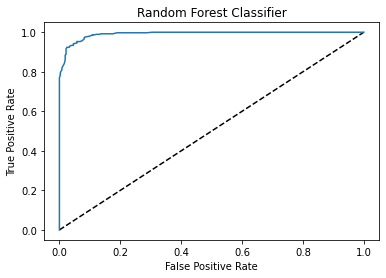

In [581]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [582]:
auc_score=roc_auc_score(y_test1,rf.predict(x_test1))
auc_score

0.9451897905759162

Graphical representation of the accuracy score at different thresholds value.
Roc_auc_score is almost equivalent to the accuracy score of the model.

# Hyper parameter tuning with GridSearchCV

In [583]:
parameter={"criterion":['gini','entropy'],
           "max_depth":np.arange(2,20),
          "max_features":["auto","log2","sqrt"],
          "bootstrap":[True,False],
          "oob_score":[True,False]}

In [584]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [585]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'oob_score': [True, False]})

In [586]:
gcv.best_params_ 

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'log2',
 'oob_score': False}

# Final Model

In [589]:
final=RandomForestClassifier(criterion="gini",max_depth=16,bootstrap=False,max_features="log2",oob_score=False)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy Score",accuracy_score(y_test1,pred))
print("Classification Report\n",classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 0.9573333333333334
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       368
           1       0.95      0.97      0.96       382

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750

[[347  21]
 [ 11 371]]


# Saving the Model

In [590]:
import joblib
joblib.dump(final,"finalmod2.pkl")

['finalmod2.pkl']